In [2]:
!pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/16.2 MB 3.1 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.2 MB 2.1 MB/s eta 0:00:08
   --- ------------------------------------ 1.6/16.2 MB 2.0 MB/s eta 0:00:08
   ---- ----------------------------------- 1.8/16.2 MB 1.9 MB/s eta 0:00:08
   ----- ---------------------------------- 2.1/16.2 MB 1.7 MB/s eta 0:00:09
   ----- ---------------------------------- 2.4/16.2 MB 1.6 MB/s eta 0:00:09
   ------ --------------------------------- 2.6/16.2 MB 1.6 MB/s eta 0:00:09
   ------- -------------------------------- 2.9/16.2 MB 1.5 MB/s eta 0:00:09
   ------- -------------------------------- 3.

In [3]:
### EDA for combined_data.geojson

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:

# Load the dataset
gdf = gpd.read_file('../../data/processed/combined_data.geojson')

# Basic info
print("\n--- Basic Information ---")
print(gdf.info())

# Preview data
print("\n--- Preview Data ---")
print(gdf.head())




--- Basic Information ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id          5947 non-null   float64 
 1   latitude    5947 non-null   object  
 2   longitude   5947 non-null   object  
 3   gl_id       3624 non-null   object  
 4   basin       5947 non-null   object  
 5   sub_basin   5947 non-null   object  
 6   area        5947 non-null   float64 
 7   elevation   5947 non-null   float64 
 8   type        3624 non-null   object  
 9   country     3624 non-null   object  
 10  gl_name     136 non-null    object  
 11  gl_code     2323 non-null   object  
 12  gl_length   2323 non-null   float64 
 13  gl_class    2323 non-null   object  
 14  orientatio  2270 non-null   object  
 15  drain_cond  2222 non-null   object  
 16  pdl         19 non-null     object  
 17  map60_code  2323 non-null   object  
 18  datasource  2

In [5]:
# Shape
print(f"\nDataset contains {gdf.shape[0]} rows and {gdf.shape[1]} columns.")

# Columns
print("\n--- Column Names ---")
print(list(gdf.columns))

# Missing values
print("\n--- Missing Values ---")
print(gdf.isnull().sum())

# Data types
print("\n--- Data Types ---")
print(gdf.dtypes)




Dataset contains 7413 rows and 24 columns.

--- Column Names ---
['id', 'latitude', 'longitude', 'gl_id', 'basin', 'sub_basin', 'area', 'elevation', 'type', 'country', 'gl_name', 'gl_code', 'gl_length', 'gl_class', 'orientatio', 'drain_cond', 'pdl', 'map60_code', 'datasource', 'map60_date', 'asso_glac', 'dist2glac', 'new_class', 'geometry']

--- Missing Values ---
id            1466
latitude      1466
longitude     1466
gl_id         3789
basin         1466
sub_basin     1466
area          1466
elevation     1466
type          3789
country       3789
gl_name       7277
gl_code       5090
gl_length     5090
gl_class      5090
orientatio    5143
drain_cond    5191
pdl           7394
map60_code    5090
datasource    5090
map60_date    5195
asso_glac     6233
dist2glac     5090
new_class     7000
geometry         0
dtype: int64

--- Data Types ---
id             float64
latitude        object
longitude       object
gl_id           object
basin           object
sub_basin       object
area 

In [6]:
# Summary statistics (numerical)
print("\n--- Summary Statistics (Numerical Columns) ---")
print(gdf.describe())




--- Summary Statistics (Numerical Columns) ---
                id         area    elevation   gl_length    dist2glac
count  5947.000000  5947.000000  5947.000000  2323.00000  2323.000000
mean    945.067597     0.045538  4968.357659   219.87387   100.104606
std     651.034546     0.189704   495.828513   249.24318   245.894114
min       0.000000     0.000000     0.000000     0.00000     0.000000
25%     372.000000     0.006832  4667.000000   105.00000     0.000000
50%     850.000000     0.013000  5031.000000   155.00000     0.000000
75%    1470.000000     0.031310  5319.000000   255.00000     2.500000
max    2382.000000     5.411391  6099.000000  5150.00000  2030.000000


In [7]:
# Summary statistics (categorical)
categorical_cols = gdf.select_dtypes(include=['object']).columns
print("\n--- Summary Statistics (Categorical Columns) ---")
print(gdf[categorical_cols].describe())




--- Summary Statistics (Categorical Columns) ---
          latitude  longitude            gl_id  basin sub_basin  type country  \
count         5947       5947             3624   5947      5947  3624    3624   
unique        5932       5915             3624      4        23     8       3   
top     85D23.836M  28D0.532M  GL086513E28887N  Koshi      Arun  M(o)   Nepal   
freq             2          2                1   3126      1018  1347    2070   

              gl_name     gl_code gl_class orientatio drain_cond pdl  \
count             136        2323     2323       2270       2222  19   
unique            109        2323        7          9          2   1   
top     Panch Pokhari  kdu_gl_300        E         SE         Ds   D   
freq               15           1      794        519       1123  19   

       map60_code        datasource map60_date   asso_glac new_class  
count        2323              2323       2218        1180       413  
unique         90                86      


--- Plotting Histograms ---


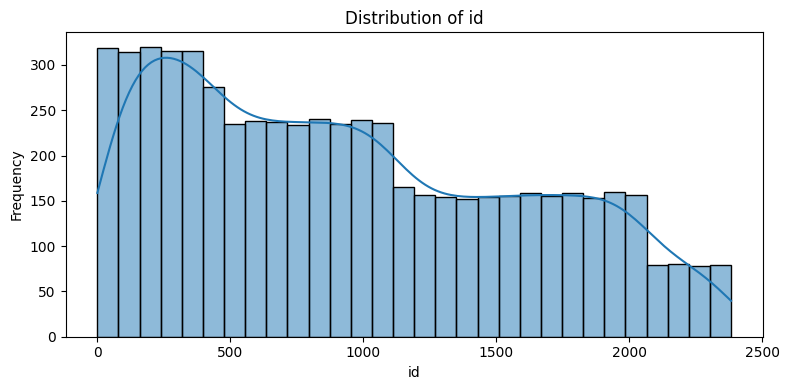

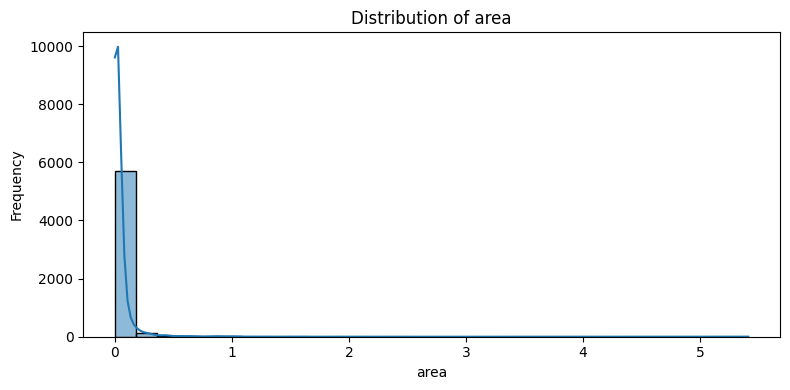

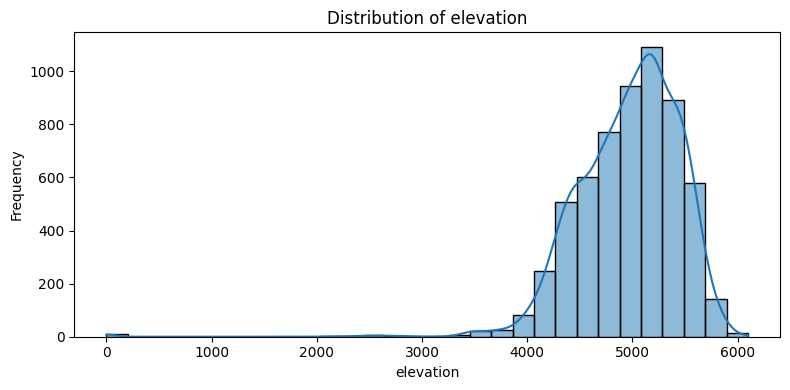

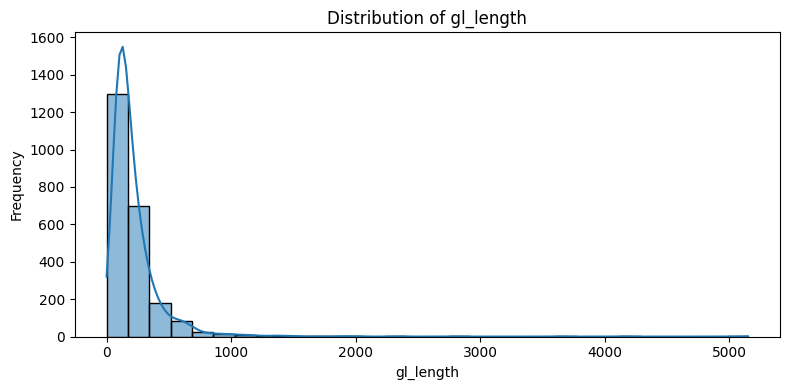

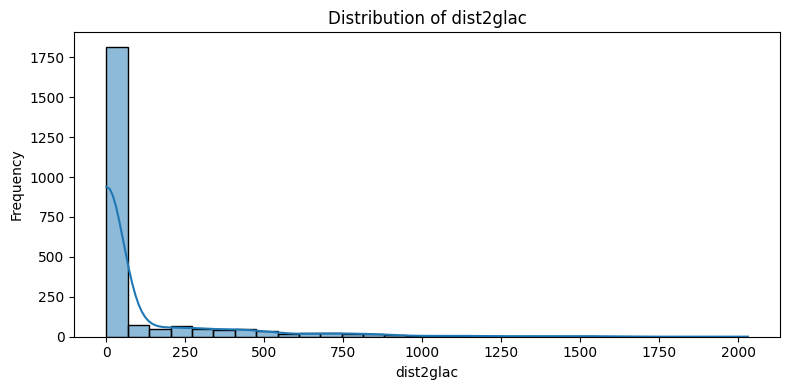

In [8]:
# Histograms for numerical features
numerical_cols = gdf.select_dtypes(include=[np.number]).columns
print("\n--- Plotting Histograms ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(gdf[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()




--- Plotting Boxplots ---


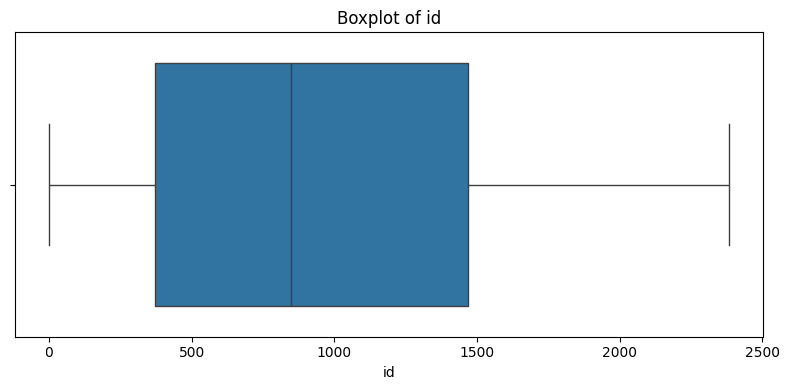

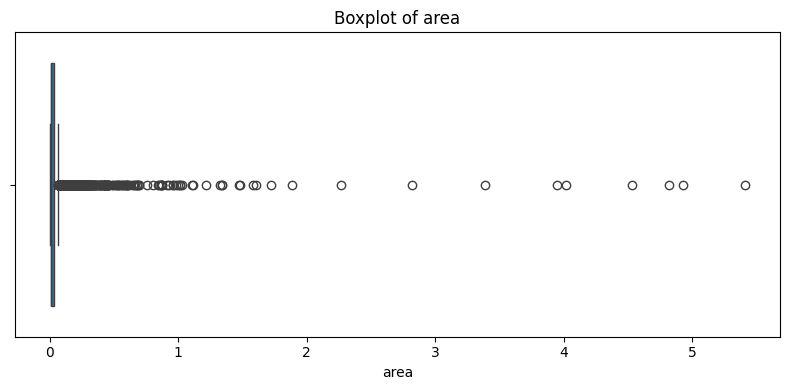

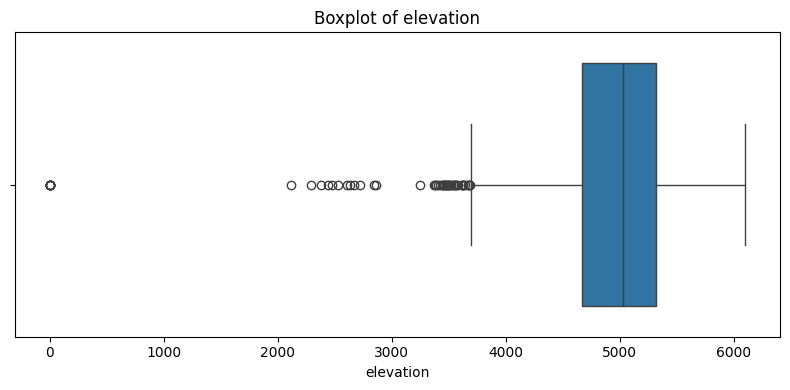

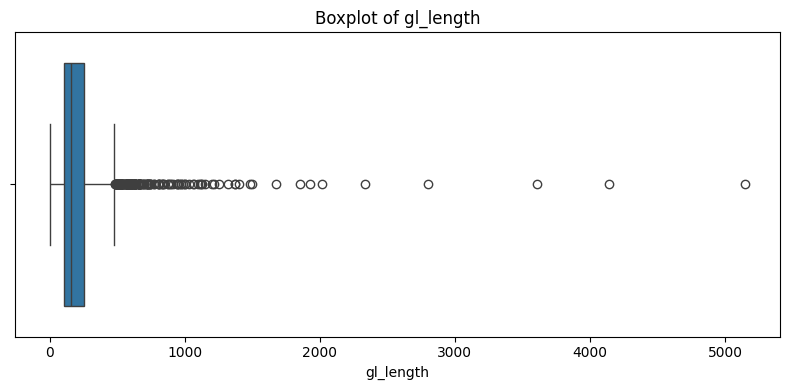

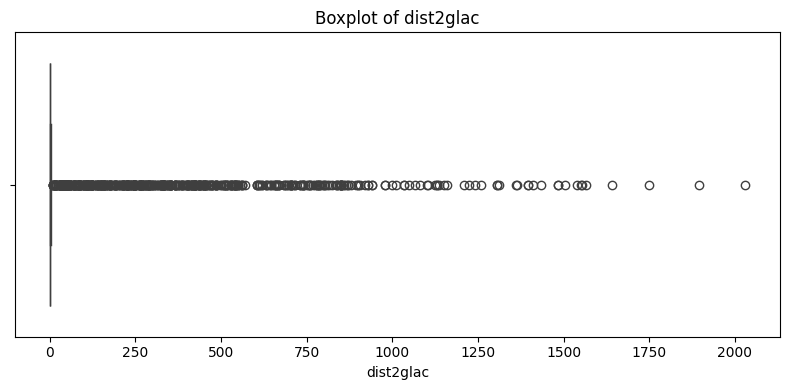

In [9]:
# Boxplots for numerical features
print("\n--- Plotting Boxplots ---")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=gdf[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()




--- Correlation Heatmap ---


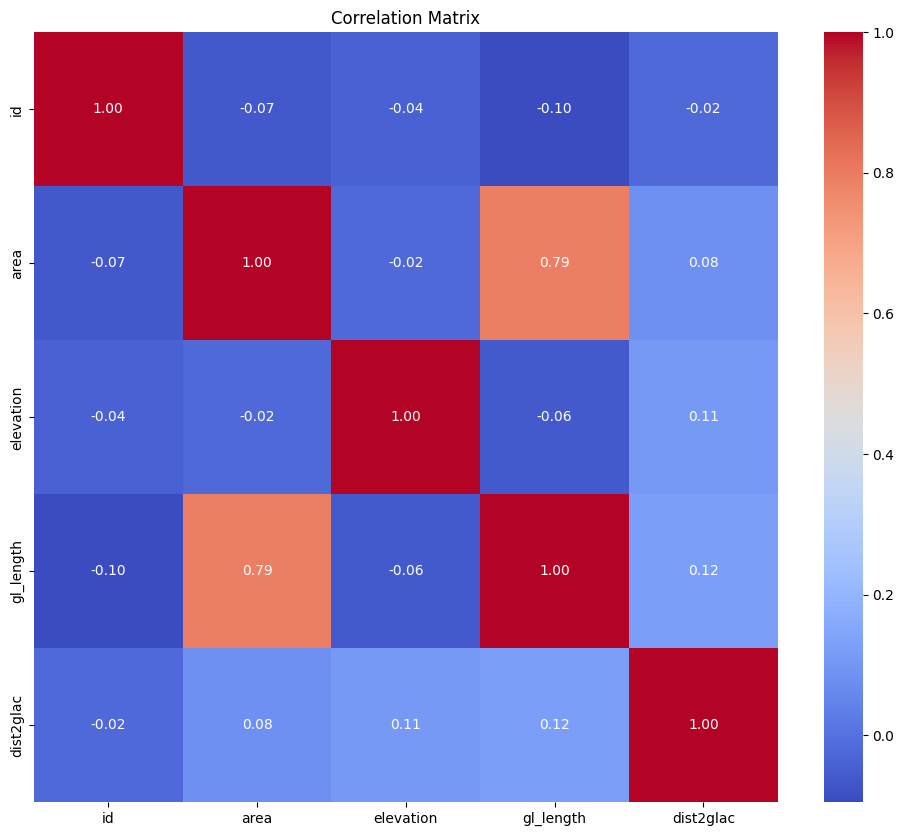

In [10]:
# Correlation heatmap
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10))
corr = gdf[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [11]:
# Unique values in categorical columns
print("\n--- Unique Values in Categorical Columns ---")
for col in categorical_cols:
    print(f"{col}: {gdf[col].nunique()} unique values")
    print(gdf[col].unique()[:10])  # showing only first 10 unique values




--- Unique Values in Categorical Columns ---
latitude: 5932 unique values
['28.8870455391' '28.8582403439' '28.8467292238' '28.8322296231'
 '28.8383615653' '28.7879852115' '28.7765931547' '28.7752013204'
 '28.7734675561' '28.7705418544']
longitude: 5915 unique values
['86.5134079075' '86.5196541055' '87.491395935' '86.5223631071'
 '87.4918398155' '87.4695863019' '87.589789418' '87.4372270979'
 '87.5534470855' '87.5943783297']
gl_id: 3624 unique values
['GL086513E28887N' 'GL086519E28858N' 'GL087491E28846N' 'GL086522E28832N'
 'GL087491E28838N' 'GL087469E28787N' 'GL087589E28776N' 'GL087437E28775N'
 'GL087553E28773N' 'GL087594E28770N']
basin: 4 unique values
['Koshi' 'Karnali' 'Gandaki' 'Mahakali' None]
sub_basin: 23 unique values
['Arun' 'Sun Koshi' 'Tama Koshi' 'Dudh Koshi' 'Tamor' 'Likhu' 'Indrawati'
 'Bheri' 'Tila' 'Mugu']
type: 8 unique values
['E(o)' 'M(o)' 'M(e)' 'E(c)' 'M(l)' 'O' 'I(s)' 'I(v)' None]
country: 3 unique values
['China' 'Nepal' 'India' None]
gl_name: 109 unique values


--- Plotting Geospatial Data ---


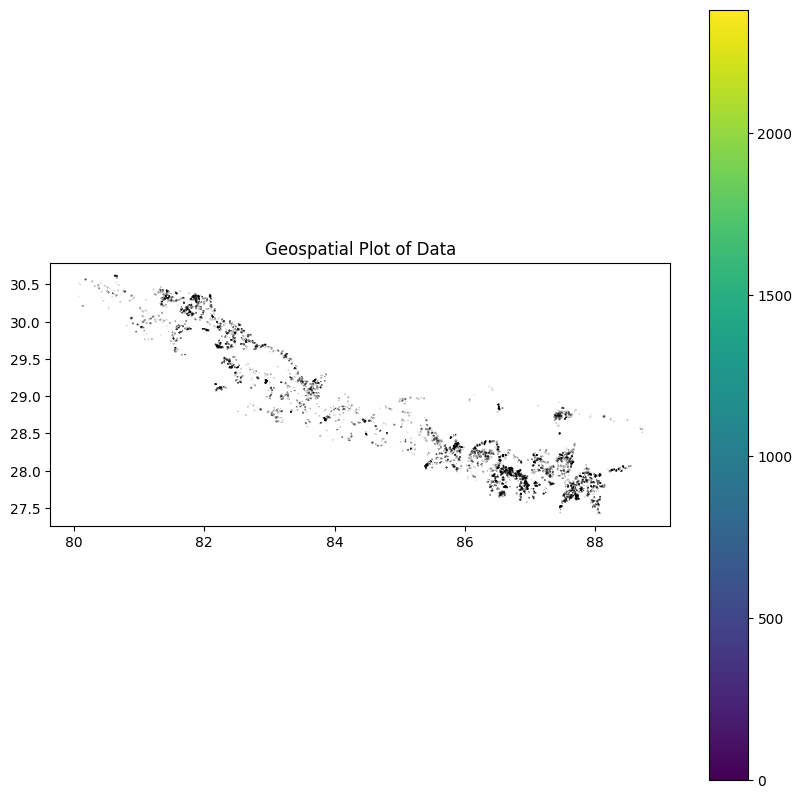

In [12]:
# Plotting the GeoData
print("\n--- Plotting Geospatial Data ---")
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', column=numerical_cols[0] if len(numerical_cols) > 0 else None, cmap='viridis', legend=True)
plt.title('Geospatial Plot of Data')
plt.show()



In [13]:
# Spatial basic stats
print("\n--- CRS (Coordinate Reference System) ---")
print(gdf.crs)

print("\n--- Bounds ---")
print(gdf.bounds)

print("\n--- Geometry Types ---")
print(gdf.geom_type.value_counts())

### Done!



--- CRS (Coordinate Reference System) ---
EPSG:4326

--- Bounds ---
           minx       miny       maxx       maxy
0     86.502534  28.881998  86.520984  28.892637
1     86.515375  28.849019  86.523863  28.867330
2     87.489851  28.845439  87.492653  28.847696
3     86.511546  28.821779  86.533193  28.845883
4     87.490709  28.835956  87.493673  28.840085
...         ...        ...        ...        ...
7408  82.261247  29.083213  82.262740  29.084941
7409  82.270819  29.083281  82.272981  29.085314
7410  82.267618  29.106306  82.269049  29.107710
7411  82.327920  29.107615  82.329007  29.108624
7412  82.325443  29.108120  82.326535  29.108968

[7413 rows x 4 columns]

--- Geometry Types ---
Polygon    7413
Name: count, dtype: int64
